In [212]:
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import pylab as pl
import seaborn as sn
from datetime import datetime as dt
from datetime import date 

In [189]:
cal = pd.read_csv('calendar_chicago_2015.csv')
cal_copy = cal.copy()

In [3]:
cal.head()

,listing_id,date,available,price
0,14831696,2018-04-01,f,NaN
1,14831696,2018-03-31,f,NaN
2,14831696,2018-03-30,f,NaN
3,14831696,2018-03-29,f,NaN
4,14831696,2018-03-28,f,NaN


In [5]:
cal.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,5541785,5541786,5541787,5541788,5541789,5541790,5541791,5541792,5541793,5541794
listing_id,14831696,14831696,14831696,14831696,14831696,14831696,14831696,14831696,14831696,14831696,...,17634195,17634195,17634195,17634195,17634195,17634195,17634195,17634195,17634195,17634195
date,2018-04-01,2018-03-31,2018-03-30,2018-03-29,2018-03-28,2018-03-27,2018-03-26,2018-03-25,2018-03-24,2018-03-23,...,2017-04-11,2017-04-10,2017-04-09,2017-04-08,2017-04-07,2017-04-06,2017-04-05,2017-04-04,2017-04-03,2017-04-02
available,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [7]:
dprint(dt.strptime(cal.loc[1].date,'%Y-%m-%d'))

2018-03-31 00:00:00


In [3]:
def convert_to_datetime(series_row):
    return dt.strptime(series_row,'%Y-%m-%d')

def convert_to_weekday(series_row,output):
    if output == 'day_num':
        return date.weekday(series_row)
    output_dict = {"weekday":'%A', "month_name":'%B',"month_num":'%m'}
    return date.strftime(series_row,output_dict[output])

def convert_to_bool(df, column, conversion):
    return df[column].replace(conversion)

def add_date_cols(df, date_column):
    df['datetime'] = df[date_column].apply(convert_to_datetime)
    df['day_num'] = df.datetime.apply(convert_to_weekday, output='day_num')
    df['day_of_week'] = df.datetime.apply(convert_to_weekday, output='weekday')
    df['month'] =  df.datetime.apply(convert_to_weekday, output='month_name')
    df['month_num'] =  df.datetime.apply(convert_to_weekday, output='month_num')

In [4]:
def get_occupied_frame(df, occ_column, date_column, conversion, bool_param):
    add_date_cols(df,date_column)
    df[occ_column] = convert_to_bool(df,occ_column,conversion)
    return df[df[occ_column] == bool_param]

In [190]:
d = {'t': True, 'f': False}
cal_occupied = get_occupied_frame(cal,'available','date', d, True)

In [191]:
cal_occupied.count()

listing_id     1260635
date           1260635
available      1260635
price          1260635
datetime       1260635
day_num        1260635
day_of_week    1260635
month          1260635
month_num      1260635
dtype: int64

In [192]:
cal[cal.available == False].count()

listing_id     618020
date           618020
available      618020
price               0
datetime       618020
day_num        618020
day_of_week    618020
month          618020
month_num      618020
dtype: int64

In [193]:
cal[cal.available == True].count()

listing_id     1260635
date           1260635
available      1260635
price          1260635
datetime       1260635
day_num        1260635
day_of_week    1260635
month          1260635
month_num      1260635
dtype: int64

In [195]:
cal_occupied.head(1)

,listing_id,date,available,price,datetime,day_num,day_of_week,month,month_num
4,1874928,2015-10-07,True,$121.00,2015-10-07,2,Wednesday,October,10


/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


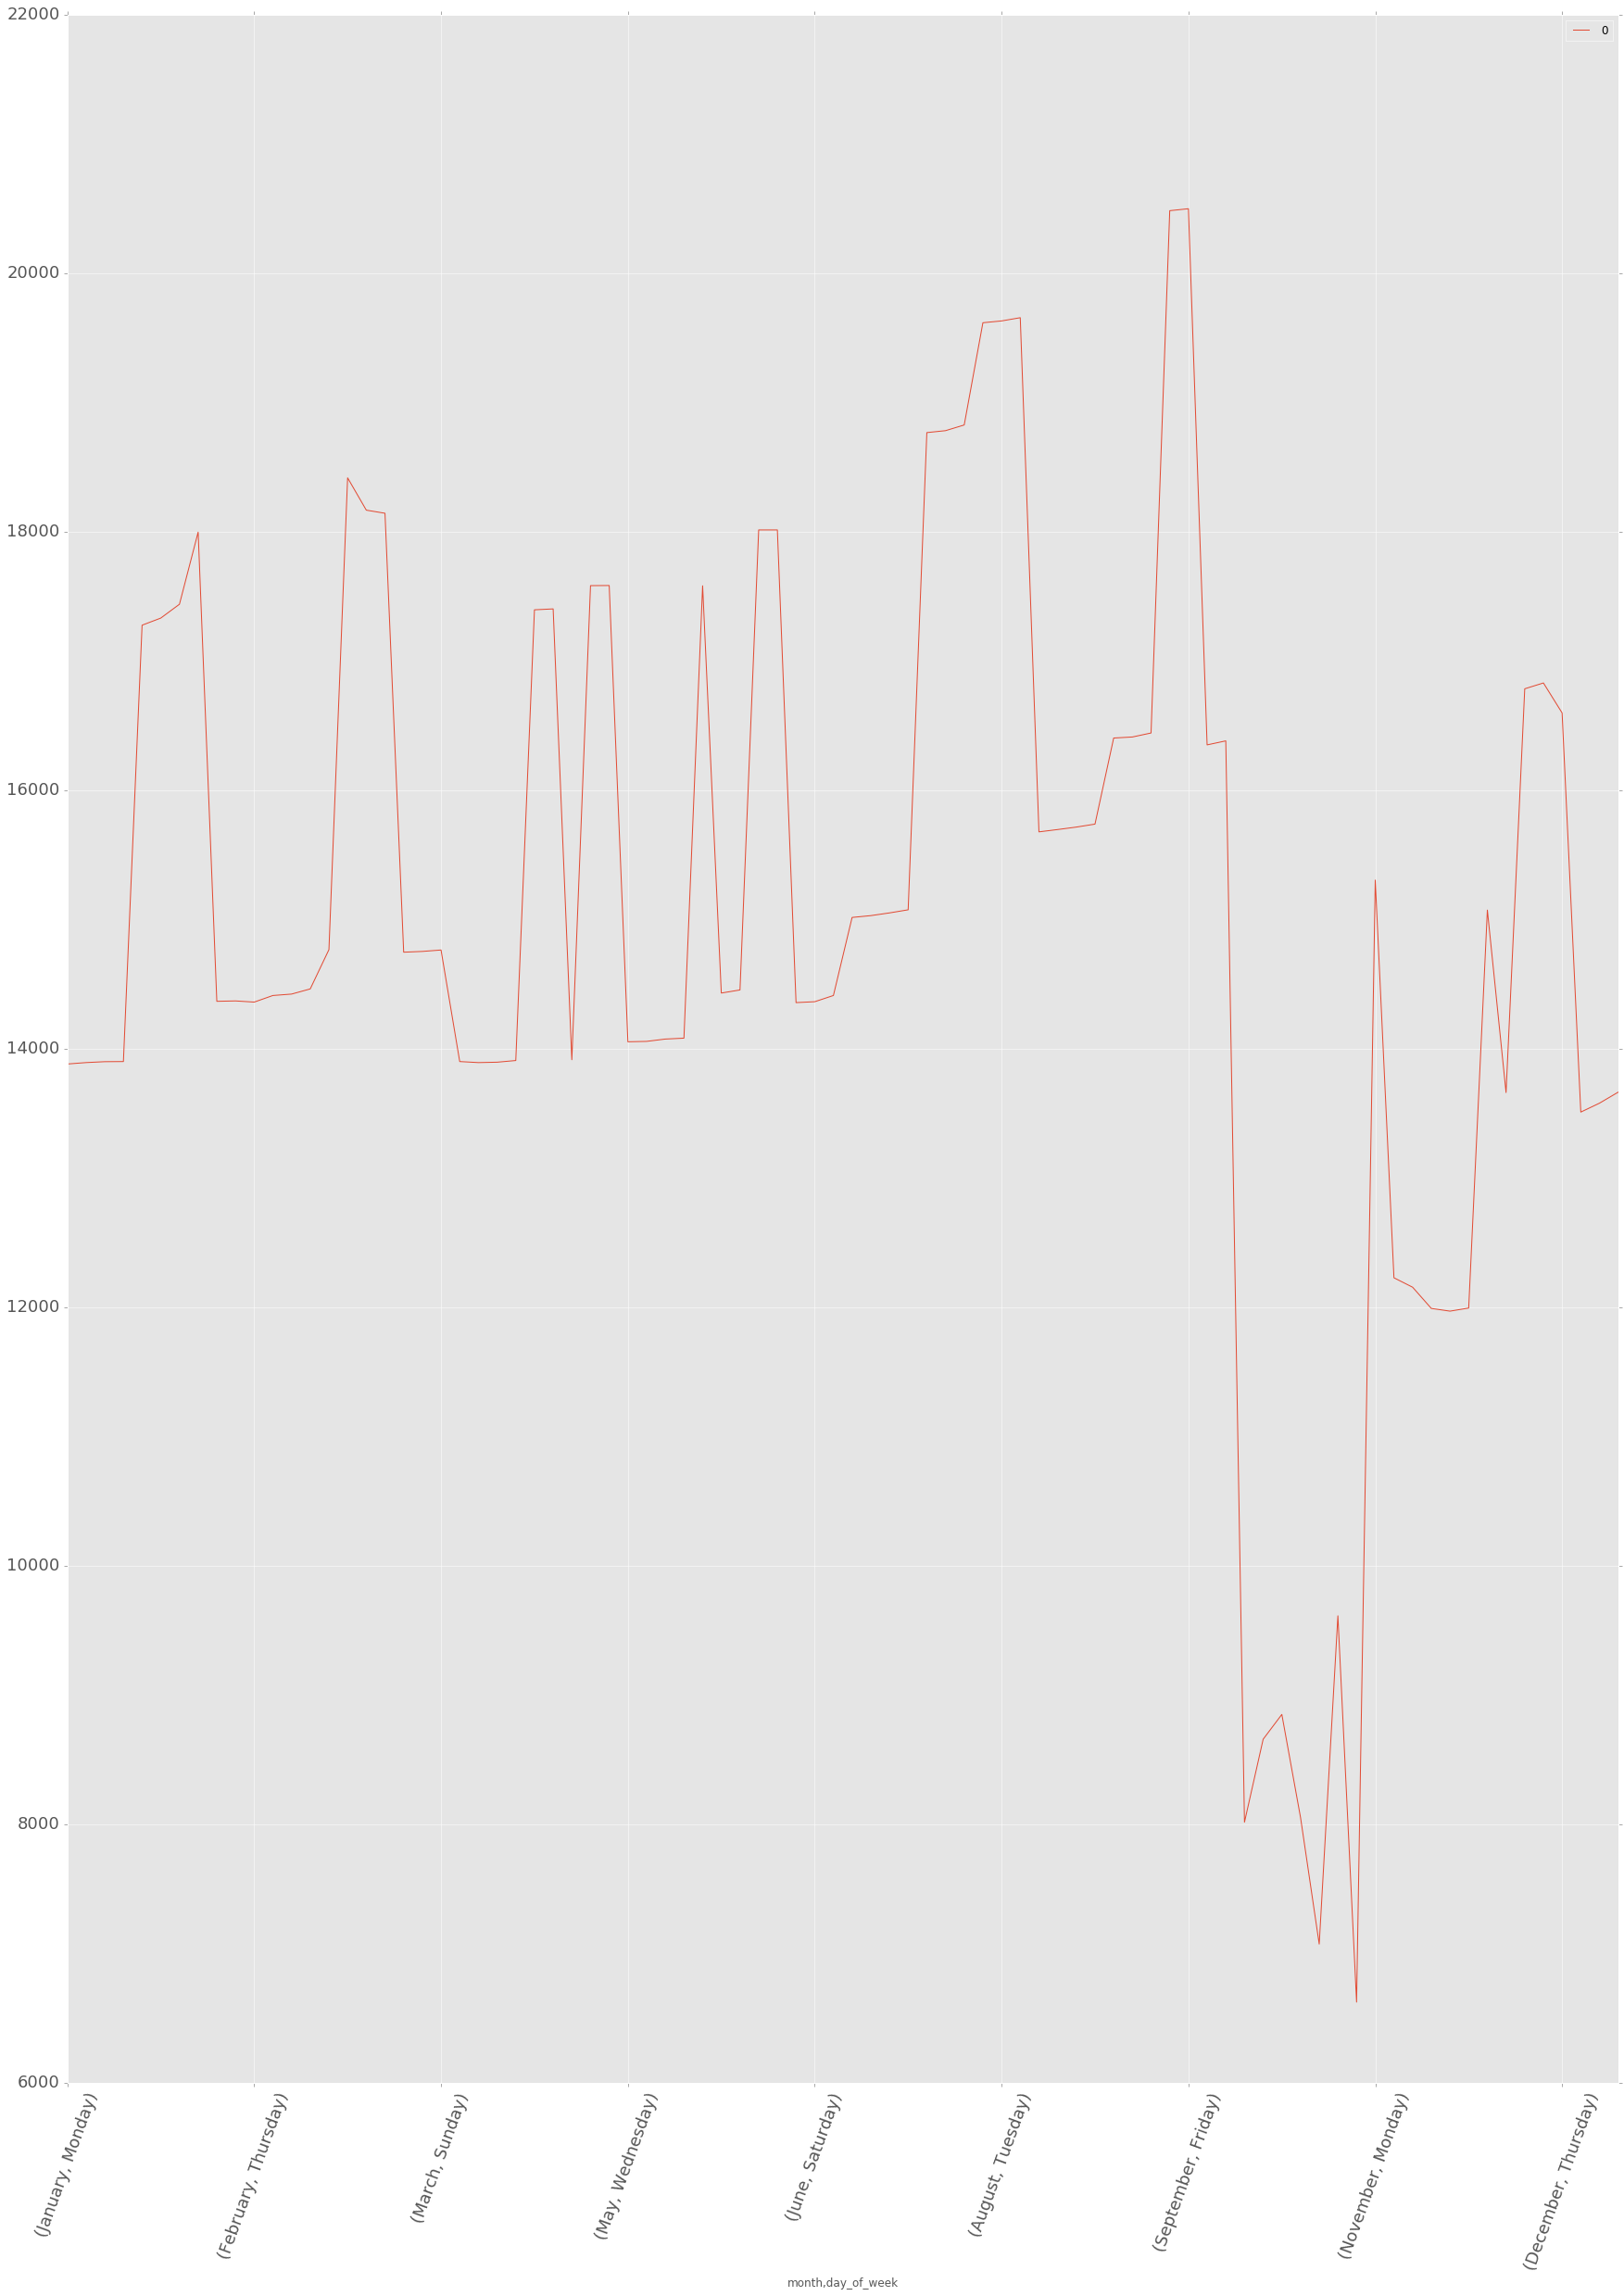

In [196]:

cal_unavailable_monthXDay = cal_occupied.sort(['month_num','day_num']).groupby(['month','day_of_week'], sort=False).size().to_frame()

cal_unavailable_monthXDay.plot(kind='line',figsize=(30,40), fontsize=18,rot=70)

month_num index     01                                               02  \
day_num              0      1      2      3      4      5      6      0   
0             0  13882  13893  13900  13901  17277  17332  17439  17997   

month_num         ...       11                   12                       \
day_num        1  ...        4      5      6      0      1      2      3   
0          14367  ...    11970  11994  15073  13661  16785  16830  16598   

month_num                       
day_num        4      5      6  
0          13510  13579  13664  

[1 rows x 85 columns]

By listing_id and month, count of occupied, and sum

In [ ]:

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name,i in cal_occupied.sort('month_num').groupby(['listing_id','month'],sort=False):#.available.count().to_frame():#.plot(kind='scatter')
    fig, ax = plt.subplots()
    print(name,i)
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    ax.plot(i[0], i[1], marker='o', linestyle='', ms=12)

In [41]:
small = cal_occupied[['listing_id','price']]

def convert_to_float(series_row):
    return float(series_row.replace('$','').replace(',',''))

small['priceNo$'] = small.price.apply(convert_to_float)
small.head()

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,listing_id,price,priceNo$
4,1874928,$121.00,121.0
10,1874928,$108.00,108.0
11,1874928,$129.00,129.0
12,1874928,$138.00,138.0
25,1874928,$105.00,105.0


In [136]:
listing = []
avg_price = []
for index, i in enumerate(small.groupby('listing_id').mean().iterrows()):#.available.count().to_frame():#.plot(kind='scatter')
    listing.append(i[0])
    avg_price.append(i[1][0])

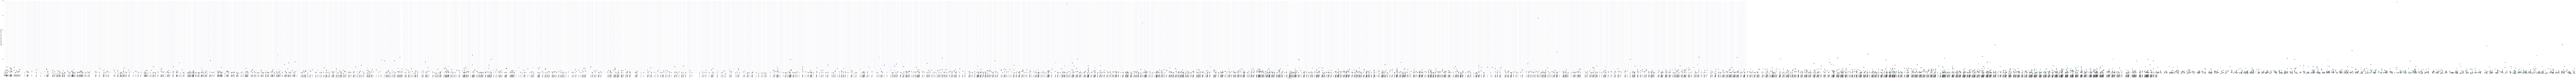

In [213]:
fig = plt.figure(figsize=(700,20))
plt.xticks(listing, listing, rotation=80)
ax = fig.add_subplot(1,1,1)
#ax.xticks(listing,listing,rotation='vertical')
ax.set_ylabel('Average Price per Listing', fontsize=20)
ax.set_xlabel('Listing_Id', fontsize=12)
for index, i in enumerate(small.groupby('listing_id').mean().iterrows()):#.available.count().to_frame():#.plot(kind='scatter')
    ax.plot(i[0], i[1], marker='o', linestyle='', ms=12)


In [ ]:
'''
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1)
plt.scatter(listing,avg_price, s = 40)
ax.set_ylabel('Average Price per Listing', fontsize=12)
ax.set_xlabel('Listing_Id', fontsize=12)
ax.set_xticklabels(, rot=80)
#fig.title('')
'''